First few rows of the Iris dataset:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Measure of Central Tendency:
                  mean   50%
sepal_length  5.843333  5.80
sepal_width   3.057333  3.00
petal_length  3.758000  4.35
petal_width   1.199333  1.30


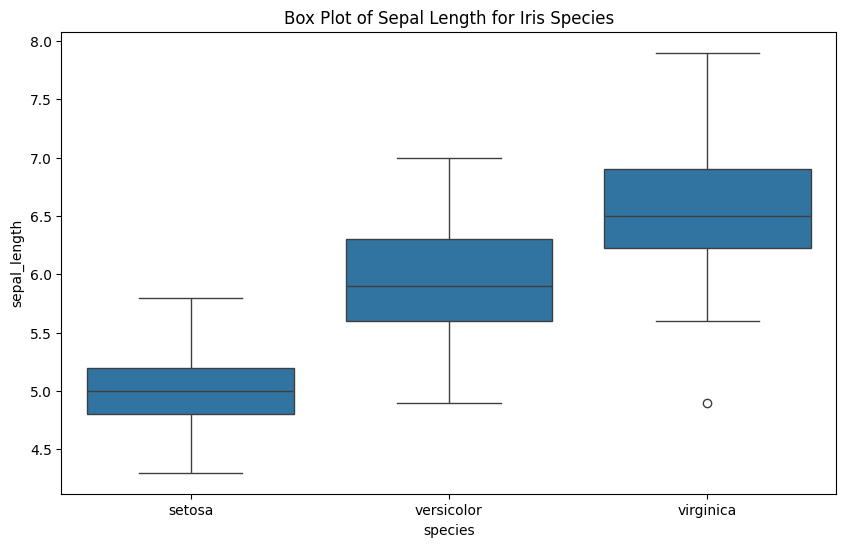


Outliers in Sepal Length:
species       
virginica  106    4.9
Name: sepal_length, dtype: float64


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
iris = sns.load_dataset("iris")

print("First few rows of the Iris dataset:\n", iris.head())

central_tendency = iris.describe().loc[['mean', '50%']].transpose()
mode_values = iris.mode(numeric_only=True).transpose()

print("\nMeasure of Central Tendency:")
print(central_tendency)
plt.figure(figsize=(10, 6))
sns.boxplot(x="species", y="sepal_length", data=iris)
plt.title("Box Plot of Sepal Length for Iris Species")
plt.show()

# Identify outliers using the IQR method
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers


outliers_sepal_length = iris.groupby("species")["sepal_length"].apply(find_outliers)

print("\nOutliers in Sepal Length:")
print(outliers_sepal_length)
